# Module 1 Ungraded Lab 2: Introduction to Bayesian Inference

Ungraded labs are designed to give learners an opportunity to apply theoretical material presented in previous videos. This ungraded lab builds on the material presented in Ungraded Lab 1 for Module 5. Material covered previously is provided here again for completeness. Ungraded labs can be completed when assigned or in conjunction with upcoming videos. Answers to ungraded labs will be provided in upcoming videos.

# Problem #1: Stopping Rules 


(This question is modified from [this website](https://www2.isye.gatech.edu/~brani/isyebayes/bank/handout2.pdf).)

Suppose health researches are studying the prevalence of a particular disease, $D$. If the percentage of people infected by $D$ in the population, $p$, is greater than 0.5, certain policies will be set to stop the spread of $D$. Researchers let $\alpha = 0.05$, and collected the following data, where `1` = "doesn't have $D$" and `0` = "does have $D$".
$$ 0, \, 0, \, 1,\, 0,\, 0, \, 0,\,  0,\,  1,\,  0,\,  0, \, 0, \, 1$$

After the data collection, a disagreement arose among researchers. Because of a lack of documentation, they could not remember which of the following methods were used to collect the data:


- [Method \#1]: Choose a random sample of size $n = 12$ from the population. Let $X$ be the number of people in their sample with $D$. ("Stop when $n = 12$".)

- [Method \#2]: Choose individuals from the population until $r=3$ individuals are found to not have $D$. Let $Y$ be the number of people chosen in order to obtain three people without $D$. ("Stop when $r = 3$".)


Notice that the data collected cannot distinguish between Method \#1 and Method \#2!

**(a) What is the distribution of $X$?** 



$X \sim Binomial(12, p)$, since the number of trials is fixed.

**(b) What is the distribution of $Y$?** 


$Y \sim NB(r,p)$; that is, $Y$ is [negative binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution), which is the number of "failures" until $r$ successes are observed.

**(c) What is the $p$-value for Method \#1?**


Note that $H_0: p = 0.5$ and, because we are interested in whether $p$ is greater than $0.5$, $H_1: p > 0.5$. 

In [1]:
p0 = 0.5; 
x = c(0,0,1,0,0,0,0,1,0,0,0,1); n = length(x); 
s = n - sum(x); s; #1 represents "does not have D" so (n -sum) = # of people who have D
1-pbinom(s-1,n,p0) #1 - cdf of binomial 
1-pbinom(s,n,p0) + dbinom(s,n,p0) #same as previous line

[1] 9

[1] 0.07299805

[1] 0.07299805

**(d) What is the $p$-value for Method \#2?**




In [2]:
1-pnbinom(s-1,3, p0) #1 - cdf of the negative binomial
#1-pnbinom(s,3, p0) + dnbinom(s,3,p0) #same as previous line

[1] 0.03271484

**(e) Do you find the combination of these results troubling? Why or why not?**



This does seem troubling. Note that, if we assume that the data were generated according to the binomial distribution, the results are not statistically significant at $\alpha = 0.05$. However, if we assume that the data were generated according to the *negative* binomial distribution, the results *are* statistically significant at $\alpha = 0.05$. Information about the rule for stopping data collection impacts the inference made. Should this matter? It doesn't seem like it should! How often do we collect data and not know the stopping rule?!

**(f) Compute the Bayesian posterior distribution for $p$, and show that the posterior is the same, independent of the stopping rule used, and for any beta prior (maybe start with a $beta(1,1)$ prior). Note that both the binomial and the negative binomial have a beta conjugate prior:**

- Binomial: If the sampling distribution for $x$ is Binomial$(n, p)$ with $n$ known, and the prior distribution is $beta(\alpha, \beta)$, the posterior distribution for $p$ is $beta(\alpha + n\bar{x}, \beta + n – n\bar{x})$.

- Negative binomial: If the sampling distribution for $x$ is negative binomial$(r, p)$ with $r$ known, and the prior distribution is $beta(\alpha, \beta)$, the posterior distribution for $p$ is $beta(\alpha + r, \beta + n - r)$. 

Parâmetros posterior (Binomial): Beta( 10 , 4 )
Parâmetros posterior (Binomial Negativo): Beta( 10 , 4 )

Estatísticas da distribuição posterior Beta(10, 4):
Média: 0.7142857 
Moda: 0.75 
DP: 0.1166424 

Probabilidade posterior de p > 0.5: 0.9538574 
Intervalo de credibilidade de 95%: [ 0.4618685 , 0.9090796 ]

--- Demonstração com prior Beta(2, 5) ---
Posterior Binomial: Beta( 11 , 8 )
Posterior Binomial Negativo: Beta( 11 , 8 )
São iguais? TRUE 


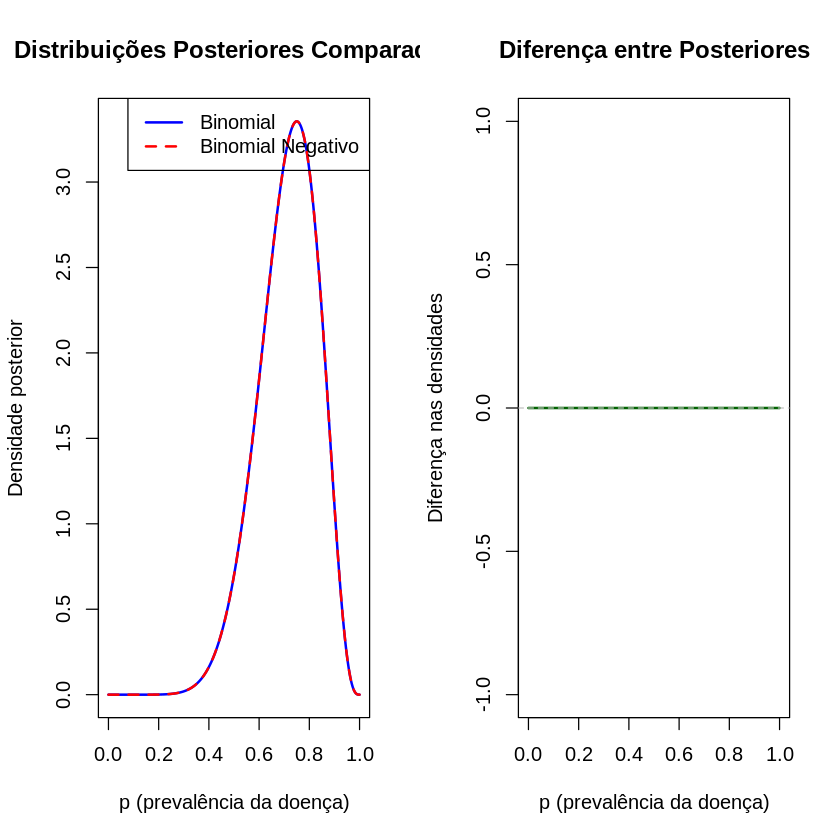

In [4]:
# use this cell block to write functions for the posterior distribution for p if the data is binomially and negative binomially distributed
# assuming a beta(1,1) prior

# Dados: 0 = tem a doença D, 1 = não tem a doença D
data <- c(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1)

# Convertendo: evento de interesse é "ter a doença" (0)
# Contar sucessos (ter a doença) e fracassos (não ter a doença)
successes <- sum(data == 0)  # número de 0s
failures <- sum(data == 1)   # número de 1s
n <- length(data)            # total de observações

# Prior Beta(1,1) - distribuição uniforme
alpha_prior <- 1
beta_prior <- 1

# 1. Modelo Binomial (regra de parada fixa: n=12)
# Posterior: Beta(alpha_prior + successes, beta_prior + failures)
alpha_post_binom <- alpha_prior + successes
beta_post_binom <- beta_prior + failures

# 2. Modelo Binomial Negativo (regra de parada: amostrar até r=3 fracassos)
# Aqui, r = failures = 3, e successes = 9
# Posterior: Beta(alpha_prior + successes, beta_prior + r)
r <- failures
alpha_post_negbinom <- alpha_prior + successes
beta_post_negbinom <- beta_prior + r

# Verificar que os parâmetros são iguais
cat("Parâmetros posterior (Binomial): Beta(", alpha_post_binom, ",", beta_post_binom, ")\n")
cat("Parâmetros posterior (Binomial Negativo): Beta(", alpha_post_negbinom, ",", beta_post_negbinom, ")\n")

# Criar uma grade de valores para p
p_grid <- seq(0, 1, length.out = 1000)

# Calcular densidades posteriores
post_binom <- dbeta(p_grid, alpha_post_binom, beta_post_binom)
post_negbinom <- dbeta(p_grid, alpha_post_negbinom, beta_post_negbinom)

# Plotar as distribuições posteriores
par(mfrow = c(1, 2))

# Plot 1: Distribuições posteriores sobrepostas
plot(p_grid, post_binom, type = "l", lwd = 2, col = "blue",
     xlab = "p (prevalência da doença)",
     ylab = "Densidade posterior",
     main = "Distribuições Posteriores Comparadas")
lines(p_grid, post_negbinom, lwd = 2, col = "red", lty = 2)
legend("topright", legend = c("Binomial", "Binomial Negativo"),
       col = c("blue", "red"), lty = c(1, 2), lwd = 2)

# Plot 2: Diferença entre as distribuições (deve ser zero)
plot(p_grid, post_binom - post_negbinom, type = "l", lwd = 2,
     xlab = "p (prevalência da doença)",
     ylab = "Diferença nas densidades",
     main = "Diferença entre Posteriores",
     col = "darkgreen")
abline(h = 0, lty = 2, col = "gray")

# Calcular estatísticas resumo
cat("\nEstatísticas da distribuição posterior Beta(10, 4):\n")
cat("Média:", alpha_post_binom/(alpha_post_binom + beta_post_binom), "\n")
cat("Moda:", (alpha_post_binom - 1)/(alpha_post_binom + beta_post_binom - 2), "\n")
cat("DP:", sqrt((alpha_post_binom * beta_post_binom) /
                ((alpha_post_binom + beta_post_binom)^2 * 
                 (alpha_post_binom + beta_post_binom + 1))), "\n")

# Calcular probabilidade posterior de p > 0.5
prob_p_gt_0.5 <- 1 - pbeta(0.5, alpha_post_binom, beta_post_binom)
cat("\nProbabilidade posterior de p > 0.5:", prob_p_gt_0.5, "\n")

# Intervalo de credibilidade de 95%
cred_interval <- qbeta(c(0.025, 0.975), alpha_post_binom, beta_post_binom)
cat("Intervalo de credibilidade de 95%: [", cred_interval[1], ",", cred_interval[2], "]\n")

# Demonstração com prior Beta diferente
cat("\n--- Demonstração com prior Beta(2, 5) ---\n")
alpha_prior2 <- 2
beta_prior2 <- 5

# Posteriores com prior Beta(2, 5)
alpha_post_binom2 <- alpha_prior2 + successes
beta_post_binom2 <- beta_prior2 + failures

alpha_post_negbinom2 <- alpha_prior2 + successes
beta_post_negbinom2 <- beta_prior2 + r

cat("Posterior Binomial: Beta(", alpha_post_binom2, ",", beta_post_binom2, ")\n")
cat("Posterior Binomial Negativo: Beta(", alpha_post_negbinom2, ",", beta_post_negbinom2, ")\n")
cat("São iguais?", all(c(alpha_post_binom2, beta_post_binom2) == 
                       c(alpha_post_negbinom2, beta_post_negbinom2)), "\n")


In [5]:
# use this cell block to plot the prior and two posterior functions on the same plot

#### Describe the differences between the two posteriors